In [1]:
import pandas as pd
import numpy as np
import re
data = pd.read_csv("./Chemical_Composion_of_Ceramic.csv")
import matplotlib.pyplot as plt
#проверяем на null
print(data.isna().sum())
data.head(5)

Ceramic Name    0
Part            0
Na2O            0
MgO             0
Al2O3           0
SiO2            0
K2O             0
CaO             0
TiO2            0
Fe2O3           0
MnO             0
CuO             0
ZnO             0
PbO2            0
Rb2O            0
SrO             0
Y2O3            0
ZrO2            0
P2O5            0
dtype: int64


,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [2]:
print(data.corr())
#P2O5 corr CaO=  -0.908
#P2O5 corr Al2O3 =  - 0.767
# Al2O3 corr Part
#del P2O5 and  CaO

#None != 0 

# data.drop(['P2O5', 'CaO', "Part"], axis= 1 , inplace= True )
data.drop(['P2O5'], axis= 1 , inplace= True )
data.head()

           Na2O       MgO     Al2O3      SiO2       K2O       CaO      TiO2  \
Na2O   1.000000 -0.132665 -0.262714  0.139292 -0.004604  0.127806 -0.040516   
MgO   -0.132665  1.000000 -0.352919 -0.141736 -0.109993  0.470367 -0.053737   
Al2O3 -0.262714 -0.352919  1.000000 -0.501473  0.077266 -0.842714  0.457752   
SiO2   0.139292 -0.141736 -0.501473  1.000000 -0.108698  0.010150 -0.288553   
K2O   -0.004604 -0.109993  0.077266 -0.108698  1.000000 -0.227049 -0.059740   
CaO    0.127806  0.470367 -0.842714  0.010150 -0.227049  1.000000 -0.403521   
TiO2  -0.040516 -0.053737  0.457752 -0.288553 -0.059740 -0.403521  1.000000   
Fe2O3 -0.021539 -0.074148  0.629756 -0.571942  0.105262 -0.486845  0.668311   
MnO   -0.030964  0.579073 -0.658123  0.115649  0.117153  0.655806 -0.352288   
CuO    0.173546  0.074152 -0.137616 -0.024608 -0.003130  0.136664 -0.079983   
ZnO   -0.251679  0.285308 -0.014174 -0.061979  0.031515  0.050769 -0.016419   
PbO2  -0.197044 -0.105113  0.343992 -0.202859  0.093

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2
0,FLQ-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80
1,FLQ-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100
2,FLQ-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80
3,FLQ-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70
4,FLQ-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80


0.375


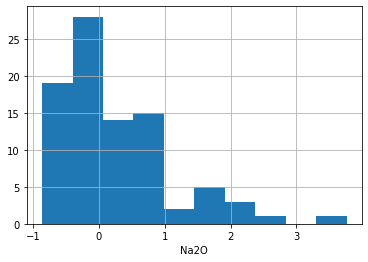

0.405


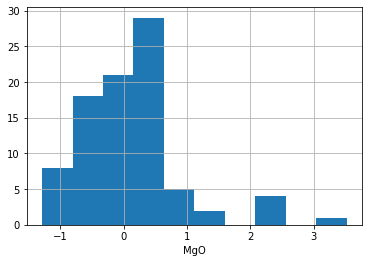

16.205


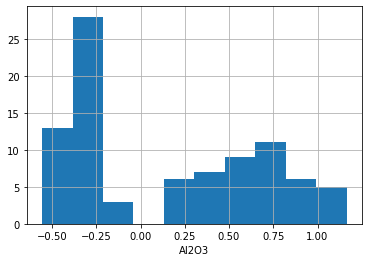

69.99000000000001


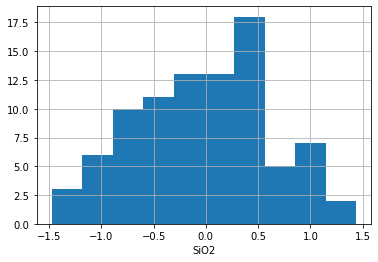

5.0649999999999995


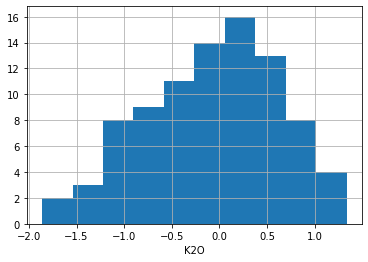

2.69


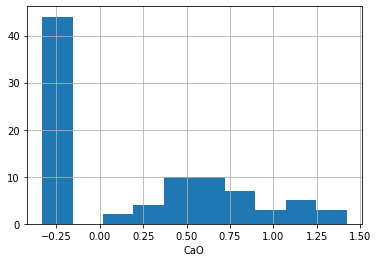

0.08


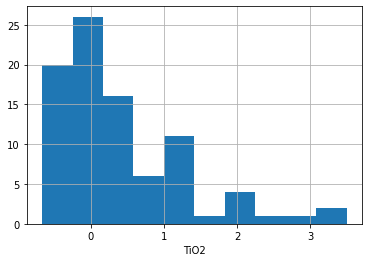

1.51


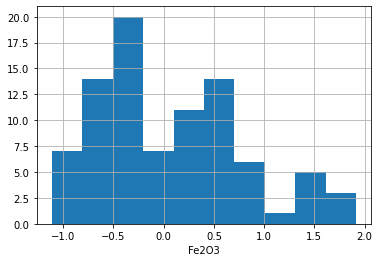

590.0


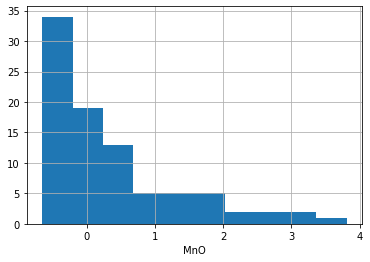

30.0


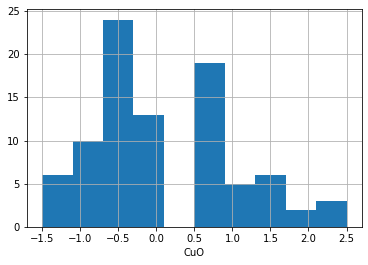

90.0


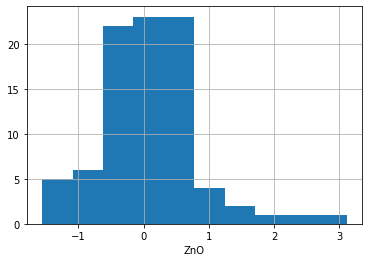

30.0


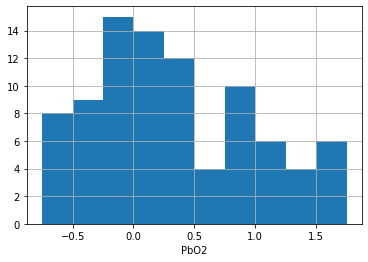

320.0


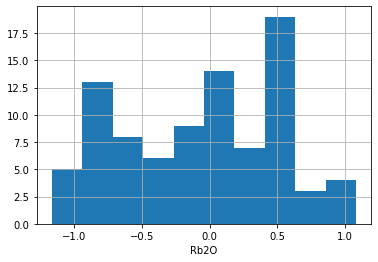

75.0


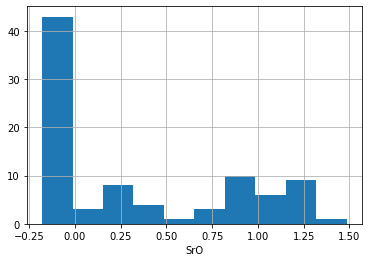

40.0


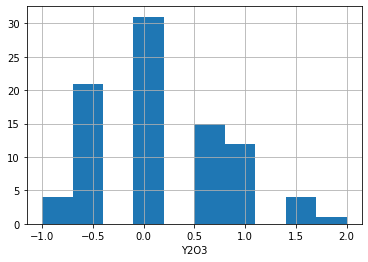

140.0


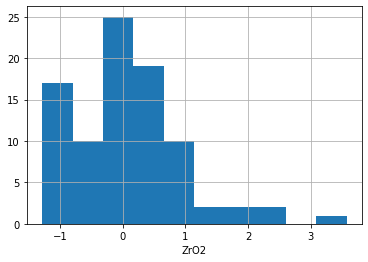

In [3]:
def find_median(column_data:pd.DataFrame) -> list[float, pd.DataFrame]:
    sort_column = column_data.sort_values()
    height = sort_column.shape[0]
    med = sort_column.iloc[height//2] if height%2 else (sort_column.iloc[height//2] + sort_column.iloc[height//2 - 1])/2
    return med, sort_column

def find_interquarter_range(column_data):
    med, sorted_column = find_median(column_data)
    print(med)
    quart_1, _ = find_median(sorted_column.iloc[: sorted_column.shape[0]//2])
    quart_3, _ = find_median(sorted_column.iloc[sorted_column.shape[0]//2 :])

    return med, quart_1, quart_3


for column in data.columns[2:]:
    med, quart1, quart3 = find_interquarter_range(data[column])
    data[column] = (data[column] - med) / (quart3 - quart1)

    data[column].hist()
    plt.xlabel(column)
    plt.show()

['FLQ-b' 'DY-BS-b' 'DY-NS-b' 'DY-Y-b' 'DY-M-b' 'DY-QC-b' 'FLQ-g' 'DY-BS-g'
 'DY-NS-g' 'DY-Y-g' 'DY-M-g' 'DY-QC-g']


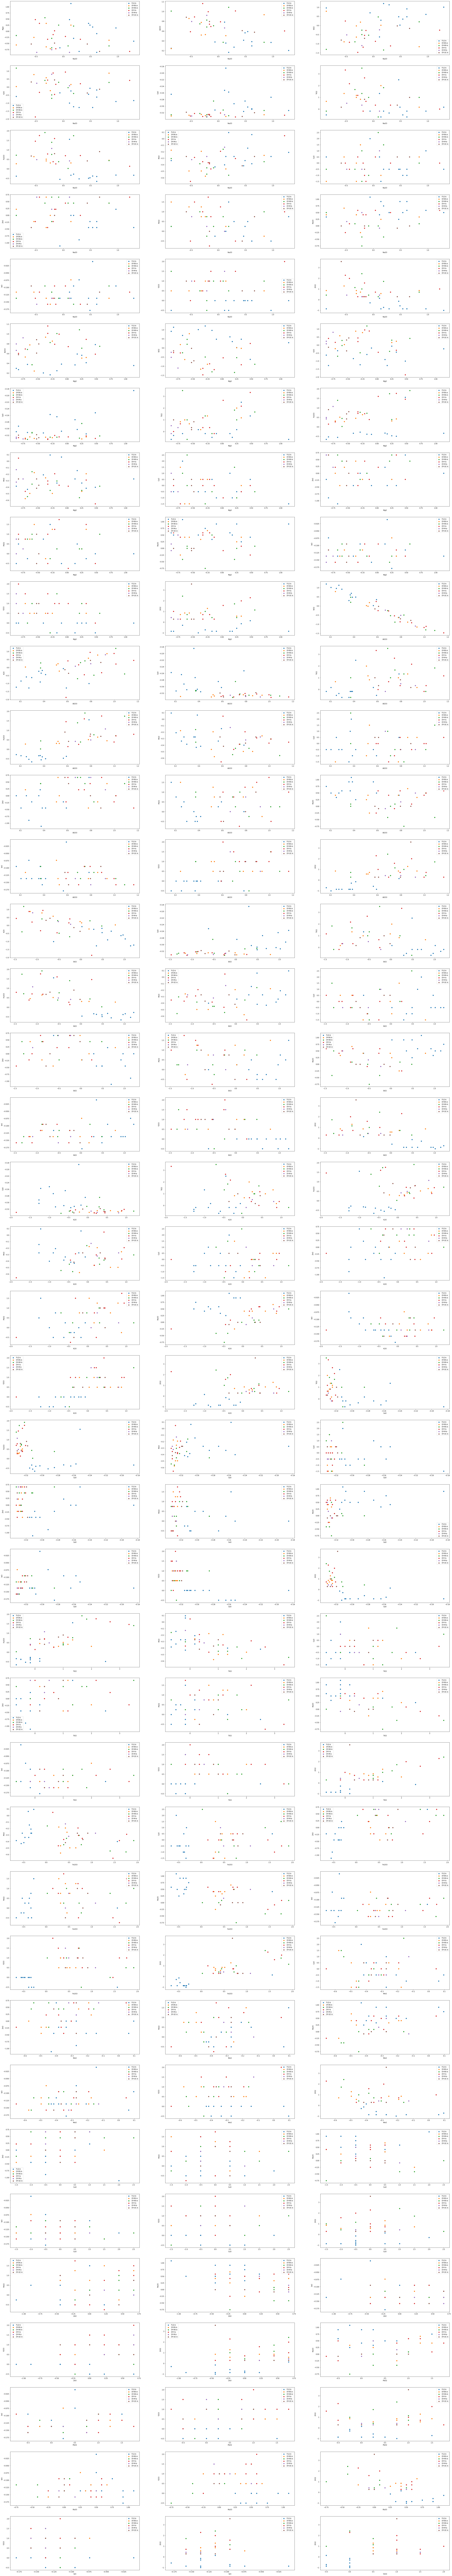

In [12]:
priznaks= data.columns[2:]
names = data["Ceramic Name"].unique()
print(names)

#Можно вызвать функцию передав ей дату, и получить клёвые графики зависимости одного элемента от другого для тел изделий.
def show_data(data:pd.DataFrame):
    
    data = data.drop(['Part'], axis=1 , inplace= False)
    data_b = data[data["Ceramic Name"].isin(names[:6])]
    data_g = data[data["Ceramic Name"].isin(names[6:])]
    fig, axs = plt.subplots(nrows= 40 , ncols= 3, figsize=(50, 300))
    count = -1
    for i in range(len(priznaks)-1):
        for j in range(i+1, len(priznaks)):
            count+=1
            for ind, category in enumerate(names[:6]):                        #Можно в двух местах заменить data_b на data_g и получить графики для глянца
                axs[count//3, count%3].scatter(priznaks[i], priznaks[j], data=data_b.loc[(data_b["Ceramic Name"] == category)], label=str(category))

            axs[count//3, count%3].set_xlabel(priznaks[i])
            axs[count//3, count%3].set_ylabel(priznaks[j])
            axs[count//3, count%3].legend()

show_data(data = data)

In [13]:
class K_mean_plus:
    def __init__(self, k:int):
        self.k = k
        self.delta = 0.004
        self.centroids = None

    #Переписать для kmean++ (переписано)
    def get_random_centroids(self, data:pd.DataFrame):
        centr = data.sample(n = self.k)
        return self.data_to_numpy(centr)
    
    #Перевод данных в numpy Для вычислений
    def data_to_numpy(self, data):
        data = np.array(data, dtype=np.float64)
        return np.array([[i, point] for i, point in enumerate(data)], dtype=list)

    #Считаем расстояние между точками
    def calc_dists(self, centroids:np.array, data:np.array):
        return np.array([[[i, np.sqrt(np.sum((centroid[1] - point[1])**2))] for centroid in centroids] for i, point in enumerate(data)], dtype=np.float64)


    #TODO можно оставить более по нампаевски (Переписано) (можешь заменить, раскоментив то, что под claster_points, эти коды идентичны)
    def points_to_centroids(self, dists:np.array, points:np.array, now_k:int):
        claster_points = {str(i): points[np.argmin(dists, axis=1) == i] for i in range(now_k)}
        return claster_points

    #Вычисляем наиболее удалённую точку для инициализации центроидов k_means++
    def calc_max_dist_point(self, centroids_points:dict, centroids:np.array):
        max_arg = 0
        max_point = None
        for cent_ind, clast_points in centroids_points.items():
            clast_dists = self.calc_dists(centroids=[centroids[int(cent_ind)]], data=clast_points)
            now_max_arg = np.argmax(clast_dists[:,:,1])
        
            if now_max_arg>max_arg:
                max_arg = now_max_arg
                max_point = clast_points[now_max_arg, :]
        return max_point


    #Инициализируем центроиды k_means++
    def get_k_plus_plus_centroids(self, points:np.array):
        centroids= [points[np.random.randint(0, len(points)), :]]

        for i in range(self.k - 1):
            dists = self.calc_dists(centroids=centroids, data=points)
            cent_points = self.points_to_centroids(dists=dists[:,:,1], points=points, now_k=i+1)
            centroids+=[self.calc_max_dist_point(centroids_points=cent_points, centroids=centroids)]

        return np.array(centroids, dtype=list)
    
    #вычисление ноывы позиций центроидов после пересчёта их "Центра масс" 
    def calc_new_centroids_pos(self, centroids_points:dict):
        return np.array([points.mean(axis=0) for points in list(centroids_points.values())], dtype=list)

    #Функция обучающая k_means, включает в себя все функции приведённые выше и логически связанные
    def fit(self, data:pd.DataFrame):
        #Можно раскоментить для центроидов у обычного K_means
        # self.centroids = self.get_random_centroids(data=data)
        num_data = self.data_to_numpy(data=data)

        #Центроиды для k_means++
        self.centroids =  self.get_k_plus_plus_centroids(points = num_data)
        flag = True
        while flag:
            dists = self.calc_dists(centroids=self.centroids, data=num_data)
            cent_points = self.points_to_centroids(dists=dists[:,:,1], points=num_data, now_k=self.k)
            new_centroids = self.calc_new_centroids_pos(centroids_points = cent_points)

            #Выводим суммарное расстояние от ВСЕХ центроидов до ИХ "цетров масс"
            print(f"all_distance is: {np.sum(np.sum(np.abs(self.centroids[:,1] - new_centroids[:,1])))}")
            if np.sum(np.sum(np.abs(self.centroids[:,1] - new_centroids[:,1]))) < self.delta:
                flag = False

            self.centroids = new_centroids

    #Функция, которая может предсказать к какому кластеру относятся введённые точки.
    def predict(self, X:pd.DataFrame):
        num_data = self.data_to_numpy(data=X)
        dists = self.calc_dists(centroids=self.centroids, data=num_data)
        cent_points = self.points_to_centroids(dists=dists[:,:,1], points=num_data, now_k=self.k)
        return cent_points
    
    #Красивый рисовач (вывод метрики оценки кластеризации)
    def drow(self, claster_names:pd.DataFrame, k_means_otvs:dict, claster_unic_names:list):
        real_class = [[0 for i in range(len(claster_unic_names))] for j in range(len(k_means_otvs))]

        for k_means_claster_name, claster_points in k_means_otvs.items():
            for i, claster_u_name in enumerate(claster_unic_names):
                real_class[int(k_means_claster_name)][i] = np.sum(claster_names.iloc[claster_points[:,0]] == claster_u_name)
        real_class = np.array(real_class)
        
        klass_elems = np.sum(real_class, axis=0) # количество элементов класса
        klaster_elems = np.sum(real_class, axis=1) # Общее количество элементов в данном кластере

        bcp_matrix = real_class**2/klaster_elems[:, None]
        bcp_classes = np.sum(bcp_matrix, axis=0)/klass_elems
        bcr_matrix = real_class**2/klass_elems
        bcr_classes = np.sum(bcr_matrix, axis=0)/klass_elems
        weighted_average = (bcp_classes + bcr_classes)/2

        print(f"{real_class}")
        #Точность предсказанных точек
        print(f"bcp_classes: {bcp_classes}")
        #Полнота для предсказанных точек
        print(f"bcr_classes: {bcr_classes}")
        print(f"weighted_average: {weighted_average}")


data_otv = data["Part"]
data_claster = data.drop(["Part", "Ceramic Name"], axis= 1 , inplace= False)
unic_names = data["Part"].unique()

a = K_mean_plus(k=2)
a.fit(data_claster)
otvs = a.predict(data_claster)
a.drow(claster_names = data_otv, k_means_otvs = otvs, claster_unic_names = unic_names)

all_distance is: 18.416413197206257
all_distance is: 4.185059669869056
all_distance is: 2.1900375250154873
all_distance is: 2.622846346819945
all_distance is: 0.668706414723303
all_distance is: 0.3499275812454092
all_distance is: 0.0
[[44 10]
 [ 0 34]]
bcp_classes: [0.81481481 0.81481481]
bcr_classes: [1.         0.64876033]
weighted_average: [0.90740741 0.73178757]


In [ ]:
class DBScan:
    def __init__(self, num_neib, max_dist):
        self.num_neib = num_neib
        self.max_dist = max_dist
        self.groups = []
        self.red_flags = set()

        #Для не наивной реализации
        self.karandash = dict()
    
    
    def data_to_numpy(self, data:pd.DataFrame):
        return np.array(data, dtype=np.float64)


    def data_save_inds(self, data:np.array):
        return np.array([[i, point] for i, point in enumerate(data)], dtype=list)
    

    def del_point(self, points_to_del_ind:int):
        points_to_del_ind = np.array([points_to_del_ind]).reshape(-1)
        self.points_indexs_queue  = np.fromiter((point_ind for point_ind in self.points_indexs_queue if point_ind not in points_to_del_ind), dtype=int)


    def get_random_point(self, points_inds:np.array):
        now_ind = np.random.choice(points_inds)
        return (self.points_queue[now_ind][0], self.points_queue[now_ind][1])


    def search_neibs(self, now_point:np.array, points:np.array):
        return [[point_ind, point] for point_ind, point in points if np.sqrt(np.sum((now_point - point)**2)) < self.max_dist]



    def check_group(self, neibs:list):
        for point_ind, neib in neibs:
            self.del_point(points_to_del_ind=point_ind)
            self.groups[-1] += [point_ind]
            now_neibs = self.search_neibs(now_point=neib, points=self.points_queue)
            #Если и эта точка является зелёной, то добавляем её соседей в список, который необходимо обойти
            if len(now_neibs) >= self.num_neib:

                #находим соседей, которые ещё не находятся в очереди на обработку
                soseds_to_add = [sosed for sosed in  now_neibs if ((sosed[0] not in np.array(neibs, dtype=list)[:,0] ) and (sosed[0] in self.points_indexs_queue))]

                if len(soseds_to_add):
                    neibs += soseds_to_add
                
            #если уже находили эту точку ранее и она оказалась в жёлтых - удаляем её оттуда.
            else:
                self.karandash.pop(str(point_ind), None)
    

    def fit(self, points:pd.DataFrame):
        self.points = self.data_to_numpy(data=points)
        self.points_queue = self.data_to_numpy(data=points)
        self.points_indexs_queue = np.arange(self.points_queue.shape[0])
        self.points_queue =self.data_save_inds(data=self.points_queue)

        while len(self.points_indexs_queue):
            
            #Выбираем рандомную точку из тех, котоые ещё не проверяли, либо из числа жёлтых
            point_ind, now_point = self.get_random_point(self.points_indexs_queue)
            self.del_point(points_to_del_ind=point_ind)

            # Реально сводит количество наблюдений к нормальному числу self.points_queue[self.points_indexs_queue]
            neibs = self.search_neibs(now_point=now_point, points = self.points_queue[self.points_indexs_queue])
            if len(neibs) < self.num_neib:
                if len(neibs)==0:
                    self.red_flags.update([point_ind])
                #наивная реализация. В случае отношения точки к жёлтым флагам, она присвоится к тому кластеру, который найдёт её первым
                else:
                    self.karandash.update({str(point_ind): now_point})

                #СОздаём новый кластер, если у точки больше чем 3 соседа, и это не точка из существующего кластера, в чём мы уверены,
                #Так как мы добавляем ВСЕ точки, которые можем добавить в кластер в check_group
            else:
                self.groups += [[point_ind]]
                self.check_group(neibs=neibs)
        
        self.red_flags.update(list(self.karandash.keys()))
        self.red_flags = [int(i) for i in self.red_flags]


    def drow(self):
        for group in self.groups:
            plt.scatter(self.points[group][:,0], self.points[group][:,1])
        plt.scatter(self.points[self.red_flags][:,0], self.points[self.red_flags][:,1])
        plt.show()


    def calk_acc(self, claster_names:pd.DataFrame, claster_unic_names:list):                #+1 так как есть redflag
            real_class = [[0 for i in range(len(claster_unic_names))] for j in range(len(self.groups) +1)]

            for g_ind, group in enumerate(self.groups + [self.red_flags]):
                print(group)
                print()
                for i, claster_u_name in enumerate(claster_unic_names):
                    real_class[g_ind][i] = np.sum(claster_names.iloc[group] == claster_u_name)
            real_class = np.array(real_class)
            
            klass_elems = np.sum(real_class, axis=0) # количество элементов класса
            klaster_elems = np.sum(real_class, axis=1) # Общее количество элементов в данном кластере

            bcp_matrix = real_class**2/klaster_elems[:, None]
            bcp_classes = np.sum(bcp_matrix[:-1], axis=0)/klass_elems
            bcr_matrix = real_class**2/klass_elems
            bcr_classes = np.sum(bcr_matrix[:-1], axis=0)/klass_elems
            weighted_average = (bcp_classes + bcr_classes)/2
            print(f"bcp_classes: {bcp_classes}")
            print(f"bcr_classes: {bcr_classes}")
            print(f"weighted_average: {weighted_average}")
            
a = DBScan(num_neib=3, max_dist=2.36)
print(data.head(3))
data_claster = data.drop(["Ceramic Name", "Part"], axis= 1 , inplace= False)
a.fit(data_claster)
data_otv = data["Part"]
data_claster = data.drop(["Ceramic Name", "Part"], axis= 1 , inplace= False)
unic_names = data["Part"].unique()
a.drow()
a.calk_acc(claster_names=data_otv, claster_unic_names=unic_names)
